In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json




In [43]:
df = pd.read_csv(r'C:\Users\Vipul\Property-Click-Prediction\notebook\datasets\property_data_set.csv',parse_dates = ['activation_date'], dayfirst=True)

df1 = pd.read_csv(r"C:\Users\Vipul\Property-Click-Prediction\notebook\datasets\property_interactions.csv",parse_dates = ['request_date'] , dayfirst=True)

df2 = pd.read_table(r"C:\Users\Vipul\Property-Click-Prediction\notebook\datasets\property_photos.tsv")

In [44]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

In [45]:
df.sample(2)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
18311,ff8081815a833856015a8365ff83167b,BHK1,2017-02-28 12:45:00,1,0,2.0,SEMI_FURNISHED,0,12.919365,77.541982,ANYONE,0,Ittamadu,TWO_WHEELER,1,350,0,560085.0,5500,40000,IF
6994,ff808181588627250158868455b21498,BHK1,2017-03-08 11:55:00,1,1,1.0,SEMI_FURNISHED,0,12.867876,77.568272,ANYONE,0,JP Nagar,TWO_WHEELER,0,500,0,560062.0,6500,65000,IF


In [46]:
print('Property data Shape', df.shape)
print('Pics data Shape',df1.shape)
print('Interaction data Shape',df2.shape)

Property data Shape (28888, 21)
Pics data Shape (170611, 2)
Interaction data Shape (28888, 2)


In [47]:
df1.sample(3)

,property_id,request_date
133815,ff8081815aae6093015aaeaf7017132c,2017-03-10 16:40:08
84554,ff8081815a30d446015a35d18c4233e6,2017-02-14 19:17:01
5131,ff8081814db00698014db411818c1667,2017-03-26 15:26:02


In [48]:
df2.sample(2)

,property_id,photo_urls
22178,ff8081815ab73de0015ab7860e8e0d1f,"[{\title\"":\""\"",\""name\"":\""files[]\"",\""imagesM..."
20782,ff8081815aa4011f015aa71702ea781c,"[{\title\"":\""\"",\""name\"":\""files[]\"",\""imagesM..."


# HANDLING PICS DATASET

In [49]:
df2.head(5)

,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006..."
1,ff8080814702d3d10147068359d200cd,NaN
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c..."
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7..."
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8..."


In [50]:
df2.shape

(28888, 2)

In [51]:
df2.dtypes

property_id    object
photo_urls     object
dtype: object

In [52]:
df2.isna().sum()

property_id        0
photo_urls     11022
dtype: int64

In [53]:
# Try to correct the first Json
text_before = df2['photo_urls'][0]
print('Before Correction: \n\n', text_before)
# Try to replace corrupted values then convert to json 
text_after = text_before.replace('\\' , '').replace('{title','{"title').replace(']"' , ']').replace('],"', ']","')
print("\n\nAfter correction and converted to json: \n\n", json.loads(text_after))

Before Correction: 

 [{\title\":\"Balcony\",\"name\":\"IMG_20131006_120837.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_65149_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_65149_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20146a5af948000ea_65149_medium.jpg\",\"large\":\"ff808081469fd6e20146a5af948000ea_65149_large.jpg\"},\"displayPic\":false},{\"title\":\"Bathroom\",\"name\":\"IMG_20131006_120734.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_63511_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_63511_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20146a5af948000ea_63511_medium.jpg\",\"large\":\"ff808081469fd6e20146a5af948000ea_63511_large.jpg\"},\"displayPic\":false},{\"title\":\"Bedroom\",\"name\":\"IMG_20131006_120643.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_16708_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_16708_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20

In [54]:
# Function to correct corrupted json and get count of photos
def correction (x):
    # if value is null put count with 0 photos
    if x is np.nan or x == 'NaN':
        return 0
    else :
        # Replace corrupted values then convert to json and get count of photos
        return len(json.loads( x.replace('\\' , '').replace('{title','{"title').replace(']"' , ']').replace('],"', ']","') ))
        
# Apply Correction Function
df2['photo_count'] = df2['photo_urls'].apply(correction)

In [55]:
# Delete photo_urls column 
del df2['photo_urls']
# Sample of Pics data
df2.sample(5)

,property_id,photo_count
20907,ff8081815aa402ce015aa7be31480a0a,7
26474,ff8081815af67c48015af9a9ad4e654c,6
24236,ff8081815ad5e9a4015ad6afc0695c2c,0
9700,ff80818159fa0f0f0159fe1e5de84b1f,11
12315,ff8081815a21c1b1015a26a9901033a3,4


To make more than one model and achieve the best of them, we assign more than one label here:


1.   The number of interactions within 3 days
2.   Interactions divided into categories within 3 days
3.   The number of interactions within 7 days
4.   Interactions divided into categories within 7 days

# Number of Interaction Within 3 Days

In this step, we will determine the number of interactions within a span of 3 days by performing the following actions:

 1. Merge the property data with the interactions data and extract the columns containing property ID, request  date, and activation date.

2. Calculate the time elapsed between the request and activation dates to identify requests made within a specific timeframe.

3. Obtain the count of requests made within the first 3 days by considering all values where the time between the request and activation date is less than 3 days.

In [56]:
# Merge data with interactions data on property_id
num_req = pd.merge(df, df1, on ='property_id')[['property_id', 'request_date', 'activation_date']]
num_req.head(5)

,property_id,request_date,activation_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,2017-03-09 14:36:00
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17,2017-03-09 14:36:00
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22,2017-03-09 14:36:00
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46,2017-03-09 14:36:00
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15,2017-03-07 12:02:00


In [58]:
# Convert 'request_date' and 'activation_date' to datetime if they are not already
num_req['request_date'] = pd.to_datetime(num_req['request_date'])
num_req['activation_date'] = pd.to_datetime(num_req['activation_date'])

In [59]:
# Get a Time between Request and Activation Date to be able to select request within the number of days
num_req['request_day'] = (num_req['request_date'] - num_req['activation_date']) / np.timedelta64(1, 'D')

In [60]:
# Show the three row of data
num_req.head(3)

,property_id,request_date,activation_date,request_day
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,2017-03-09 14:36:00,1.129560
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17,2017-03-09 14:36:00,0.052280
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22,2017-03-09 14:36:00,1.121088


In [61]:
# Get a count of requests in the first 3 days  
num_req_within_3d = num_req[num_req['request_day'] < 3].groupby('property_id').agg({ 'request_day':'count'}).reset_index()

# Show every property id with the number of requests in the first 3 days
num_req_within_3d = num_req_within_3d.rename({'request_day':'request_day_within_3d'},axis=1)

# Dataset with the number of requests within 3 days
num_req_within_3d

,property_id,request_day_within_3d
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,3
2,ff808081470c645401470fb03f5800a6,15
3,ff808081470c6454014715eaa5960281,5
4,ff808081474aa867014771a0298f0aa6,25
...,...,...
13205,ff8081815b1fdda8015b1fdf585c004b,2
13206,ff8081815b1fdda8015b1fe675ae0146,5
13207,ff8081815b1fdda8015b1ffee8a305d2,2
13208,ff8081815b200540015b20158b0103c9,2


Now, we have the request_day_within_3d column which has the number of requests within three days.

We can convert the Interaction values to categorical values.

We will use the following categories:

1. cat_1_to_2: one or two requests within 3 days;
2. cat_3_to_5 : three to five requests within 3 days;
3. cat_above_5 : above five requests within 3 days;

In [63]:
num_req_within_3d['request_day_within_3d'].value_counts()[:9]

request_day_within_3d
1    5940
2    2741
3    1579
4     887
5     583
6     373
7     246
8     186
9     148
Name: count, dtype: int64

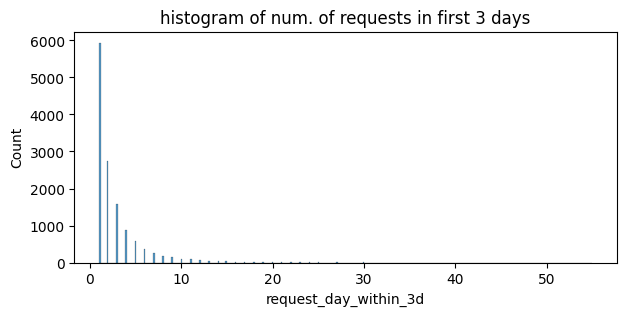

In [64]:
# Show histogram of the number of requests in the first 3 days
plt.figure(figsize=(7,3))
sns.histplot(num_req_within_3d, x="request_day_within_3d")

plt.title('histogram of num. of requests in first 3 days')
plt.show()

In [65]:
def categorise(x):
    if x in [1,2]:
        return 'cat_1_to_2'
    elif x in [3,4,5]:
        return 'cat_3_to_5'
    else:
        return 'cat_above_5'

In [66]:
num_req_within_3d['categories_3day'] = num_req_within_3d['request_day_within_3d'].apply(categorise)
num_req_within_3d.head(3)

,property_id,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,3,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,15,cat_above_5


In [67]:
num_req_within_3d['categories_3day'].value_counts()

categories_3day
cat_1_to_2     8681
cat_3_to_5     3049
cat_above_5    1480
Name: count, dtype: int64

# Number of Interaction Within 1 Week

In this step, like before, we will get the number of interactions but this time within 7 days by following steps:

1. By taking the dataset we used before which has [property_id, request_date, activation_date] columns.
2. We get a count of requests within the first 7 days, by taking all values if the Time between the Request and Activation Date is less than 7.

In [68]:
# Get a count of requests in the first 7 days  
num_req_within_7d = num_req[num_req['request_day'] < 7].groupby('property_id').agg({ 'request_day':'count'}).reset_index()

# Show every property id with the number of requests in the first 7 days
num_req_within_7d = num_req_within_7d.rename({'request_day':'request_day_within_7d'},axis=1)

# Dataset with the number of requests within 7 days
num_req_within_7d

,property_id,request_day_within_7d
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,5
2,ff808081470c645401470fb03f5800a6,22
3,ff808081470c6454014715eaa5960281,7
4,ff808081474aa867014771a0298f0aa6,52
...,...,...
17381,ff8081815b1fdda8015b1fe675ae0146,8
17382,ff8081815b1fdda8015b1ffee8a305d2,3
17383,ff8081815b1fdda8015b2000369205fd,2
17384,ff8081815b200540015b20158b0103c9,2


We can convert the Interaction values to categorical values. After seeing the distribution of interactions within 3 days, we decide to convert the values into three classes:

1. cat_1_to_2: one or two requests within 7 days
2. cat_3_to_5 : three to five requests within 7 days
3. cat_above_5 : above five requests within 7 days

In [69]:
num_req_within_7d['request_day_within_7d'].value_counts()[:10]


request_day_within_7d
1     5856
2     3381
3     2118
4     1421
5     1047
6      735
7      597
8      373
9      323
10     240
Name: count, dtype: int64

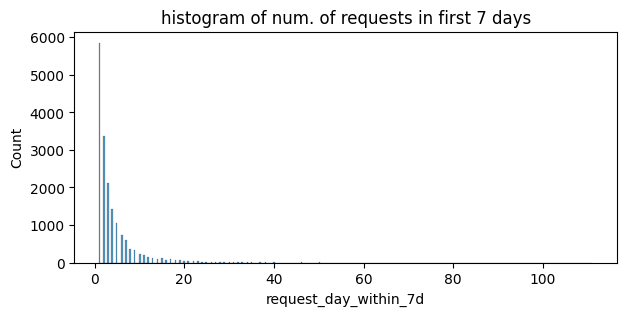

In [70]:
# Show histogram of the number of requests in the first 3 days
plt.figure(figsize=(7,3))
sns.histplot(num_req_within_7d, x="request_day_within_7d")

plt.title('histogram of num. of requests in first 7 days')
plt.show()

In [86]:
num_req_within_7d['categories_7day'] = num_req_within_7d['request_day_within_7d'].apply(categorise)
num_req_within_7d.head(3)

,property_id,request_day_within_7d,categories_7day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,11,cat_above_5
2,ff808081470c645401470fb03f5800a6,27,cat_above_5


In [87]:
num_req_within_7d['categories_7day'].value_counts()

categories_7day
cat_above_5    8318
cat_1_to_2     8098
cat_3_to_5     5765
Name: count, dtype: int64

# MERGE ALL DATA-SET

In [76]:
df.sample(1)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
20716,ff8081815aa3a630015aa3b24a7704e1,BHK3,2017-03-06 18:44:00,3,4,10.0,FULLY_FURNISHED,1,12.990273,77.719593,ANYONE,1,Whitefield,BOTH,2,1600,1,560048.0,4000,30000,AP


In [77]:
df1.sample(1) #Intersection data

,property_id,request_date
101887,ff8081815a63ff3d015a649e7881511f,2017-03-20 22:47:30


In [78]:
df2.sample(1) #pics data

,property_id,photo_count
1395,ff8081814fd4a00e014fd4ccbc590170,7


In [79]:
num_req_within_3d.sample()

,property_id,request_day_within_3d,categories_3day
6186,ff8081815a30d446015a35cf04833145,3,cat_3_to_5


In [88]:
num_req_within_7d.sample()

,property_id,request_day_within_7d,categories_7day
1929,ff80818151e74be30151e767997601b6,8,cat_above_5


In [89]:
print(num_req_within_3d.shape)
print(num_req_within_7d.shape)

(13210, 3)
(22181, 3)


In [90]:
label_data = pd.merge(num_req_within_7d, num_req_within_3d, on ='property_id' , how='left')

label_data.head(3)

,property_id,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,11,cat_above_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,27,cat_above_5,15.0,cat_above_5


In [91]:
label_data.isna().sum()

property_id                 0
request_day_within_7d       0
categories_7day             0
request_day_within_3d    8971
categories_3day          8971
dtype: int64

In [92]:
data_with_pics = pd.merge(df, df2, on ='property_id', how = 'left')
data_with_pics.head(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,12


In [93]:
dataset = pd.merge(data_with_pics, label_data, on ='property_id')
dataset.head(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0,11,cat_above_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,12,27,cat_above_5,15.0,cat_above_5


In [94]:
dataset.isna().sum()

property_id                 0
type                        0
activation_date             0
bathroom                    0
floor                       0
                         ... 
photo_count                 0
request_day_within_7d       0
categories_7day             0
request_day_within_3d    8971
categories_3day          8971
Length: 26, dtype: int64